**Цель - знакомство с возможностями гомологичного моделирования комплекса белка с лигандом**

In [2]:
import sys 
import modeller 
import _modeller
import modeller.automodel

import nglview
import ipywidgets

from IPython.display import Image

In [3]:
env=modeller.environ()
env.io.hetatm=True


                         MODELLER 9.19, 2017/07/19, r11078

     PROTEIN STRUCTURE MODELLING BY SATISFACTION OF SPATIAL RESTRAINTS


                     Copyright(c) 1989-2017 Andrej Sali
                            All Rights Reserved

                             Written by A. Sali
                               with help from
              B. Webb, M.S. Madhusudhan, M-Y. Shen, G.Q. Dong,
          M.A. Marti-Renom, N. Eswar, F. Alber, M. Topf, B. Oliva,
             A. Fiser, R. Sanchez, B. Yerkovich, A. Badretdinov,
                     F. Melo, J.P. Overington, E. Feyfant
                 University of California, San Francisco, USA
                    Rockefeller University, New York, USA
                      Harvard University, Cambridge, USA
                   Imperial Cancer Research Fund, London, UK
              Birkbeck College, University of London, London, UK


Kind, OS, HostName, Kernel, Processor: 4, Linux shadbox 3.2.0-29-generic x86_64
Date and time of compilation 

! Образец (лизоцим форели)

wget http://www.pdb.org/pdb/files/1lmp.pdb

wget http://www.uniprot.org/uniprot/P11941.fasta

! Целевой комплекс (лизоцим курицы)

wget http://www.pdb.org/pdb/files/132L.pdb

wget http://www.uniprot.org/uniprot/P00698.fasta

In [20]:
lmp = nglview.show_structure_file('1lmp.pdb')
lmp

NGLWidget()

In [23]:
env = modeller.environ()
env.io.hetatm = True

alignm = modeller.alignment(env)
alignm.append(file='P00698.fasta', align_codes='all', alignment_format='FASTA')

mdl = modeller.model(env, file='1lmp.pdb', model_segment=('FIRST:'+'A', 'LAST:'+'A'))
alignm.append_model(mdl, atom_files='1lmp.pdb', align_codes='1lmp')
alignm[0].code = 'bad_protein'

alignm.salign()
alignm.write(file='bad_protein.ali', alignment_format='PIR')
s = alignm[0]
pdb = alignm[1]
print s.code, pdb.code

a = modeller.automodel.automodel(env, alnfile='bad_protein.ali', knowns= pdb.code , sequence = s.code )
a.name='mod'+s.code
a.starting_model = 1
a.ending_model = 1
a.make()

read_pd_459W> Residue type  NAG not recognized. 'automodel' model building
              will treat this residue as a rigid body.
              To use real parameters, add the residue type to ${LIB}/restyp.lib,
              its topology to ${LIB}/top_*.lib, and suitable forcefield
              parameters to ${LIB}/par.lib.
rdpdb___459W> Residue type  NDG not recognized. 'automodel' model building
              will treat this residue as a rigid body.
              To use real parameters, add the residue type to ${LIB}/restyp.lib,
              its topology to ${LIB}/top_*.lib, and suitable forcefield
              parameters to ${LIB}/par.lib.

SALIGN_____> adding the next group to the alignment; iteration    1
bad_protein 1lmp
fndatmi_285W> Only      129 residues out of      132 contain atoms of type  CA
              (This is usually caused by non-standard residues, such
              as ligands, or by PDB files with missing atoms.)
fndatmi_285W> Only      129 residues out of      

In [24]:
bad_protein = nglview.show_structure_file('bad_protein.B99990001.pdb')
bad_protein

NGLWidget()

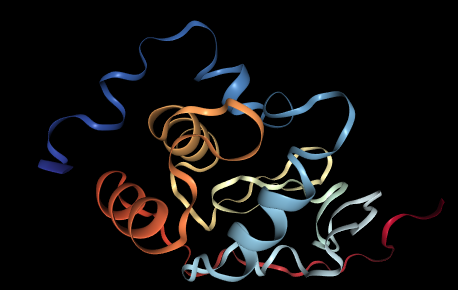

In [25]:
Image('bad_protein.png')

In [26]:
## Получаем список остаков
l1 = alignm[1].residues[129:132]
l1

[Residue 130:A (type NAG), Residue 131:A (type NAG), Residue 132:A (type NDG)]

In [28]:
# Припишем точки, как обозначение лиганда
stri = ''
for i in alignm[0].residues:
    stri += i.code
stri += '...'

# Добавляем последовательность из строки
alignm.append_sequence(stri)

## Выбираем объект для моделирования 
s = alignm[2]
pdb = alignm[1]
s.code = 'good'

alignm.salign()
alignm.write(file='alignment.ali', alignment_format='PIR')

# создадим другое окружение, чтобы точно все работало
env1=modeller.environ()
env1.io.atom_files_directory = ['.', '../atom_files']
env1.io.hetatm=True 

## Создаем новый объект automodel
a = modeller.automodel.automodel(env1, alnfile='alignment.ali', knowns= pdb.code , sequence = s.code )
a.name='mod'+s.code
a.starting_model = 1
a.ending_model = 1
a.make()


SALIGN_____> adding the next group to the alignment; iteration    1

SALIGN_____> adding the next group to the alignment; iteration    2

SALIGN_____> adding the next group to the alignment; iteration    3
read_pd_459W> Residue type  NAG not recognized. 'automodel' model building
              will treat this residue as a rigid body.
              To use real parameters, add the residue type to ${LIB}/restyp.lib,
              its topology to ${LIB}/top_*.lib, and suitable forcefield
              parameters to ${LIB}/par.lib.
rdpdb___459W> Residue type  NDG not recognized. 'automodel' model building
              will treat this residue as a rigid body.
              To use real parameters, add the residue type to ${LIB}/restyp.lib,
              its topology to ${LIB}/top_*.lib, and suitable forcefield
              parameters to ${LIB}/par.lib.
fndatmi_285W> Only      129 residues out of      132 contain atoms of type  CA
              (This is usually caused by non-standard residu

In [29]:
good_protein = nglview.show_structure_file('good.B99990001.pdb')
good_protein

NGLWidget()

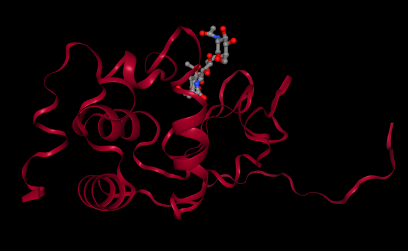

In [30]:
Image('good_protein.png')